In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import datetime
from setdir import *
from plotglider import *
from scipy.io import loadmat # to load bathymetry
import xarray as xr
import seaborn as sns
import glob
from scipy import stats

In [4]:
# Load latest full dataset and gridded profiles
glider_names = {
    'unit_409': 'Grease',
    'unit_398': 'Churchill',
}
unit_list = [(k) for k in glider_names.keys()]

for uname in unit_list:
    # Glider data
    fname = uname+'_2022*nc'

    # Extract a list with the names of existing raw data files
    existing_files = glob.glob(cat_proc_path(fname))

    # Check whether there are any
    if len(existing_files) > 0:
        # Extract the end date from the filename
        existing_files = sorted(existing_files)
        latest_file = existing_files[-1]

        # Open the dataset
        data_ds = xr.open_dataset(latest_file)
        
        if uname=='unit_409':
            exec('unit409=data_ds.copy()')
        elif uname=='unit_398':
            exec('unit398=data_ds.copy()')
        
    #Glider positions
    fname = uname+'_position_2022*nc'

    # Extract a list with the names of existing raw data files
    existing_files = glob.glob(cat_raw_path(fname))

    if len(existing_files) >0:
        existing_files = sorted(existing_files)
        latest_file = existing_files[-1]
        
        pos_ds = xr.open_dataset(latest_file)
        
        if uname=='unit_409':
            exec('unit409pos=pos_ds.copy()')
        elif uname=='unit_398':
            exec('unit398pos=pos_ds.copy()')
            
    # Gridded glider data
    fname = uname+'_bin10m.nc'
    grid_ds = xr.open_dataset(cat_proc_path(fname))
    
    if uname=='unit_409':
        exec('grid409=grid_ds.copy()')
    elif uname=='unit_398':
        exec('grid398=grid_ds.copy()')
        
            
# Location for bathymetry file
matlab_file = 'labsea_66.44W_45.68N_5min.mat'
input_bathy_file = cat_proc_path(matlab_file)
mat_data = loadmat(input_bathy_file)
bathy_data = mat_data['bathy']
bathylat = bathy_data['lat'][0][0].flatten()
bathylon = bathy_data['lon'][0][0].flatten()
bathy = bathy_data['depth'][0][0]



In [5]:
# Initialise the figure directory
figdir = create_figdir()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

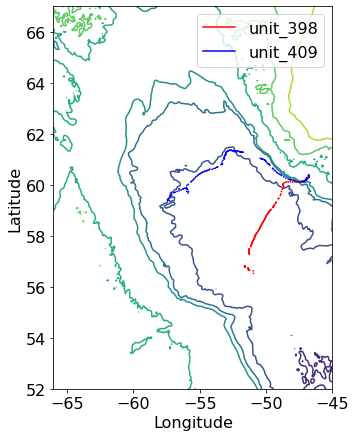

In [6]:
# Map the bathymetry and glider tracks 
# Ok, the glider tracks are spotty: Might mean that the m_gps_lon and m_gps_lat aren't the right variables to download!
map_tracks(bathylon,bathylat,bathy,unit409,unit398)

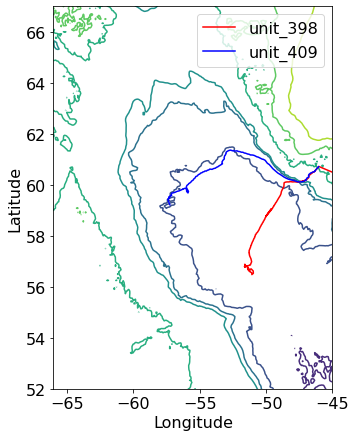

In [18]:
# Map the bathymetry and glider tracks 
# Ok, the glider tracks are spotty: Might mean that the m_gps_lon and m_gps_lat aren't the right variables to download!
map_tracks_pos(bathylon,bathylat,bathy,unit409pos,unit398pos)

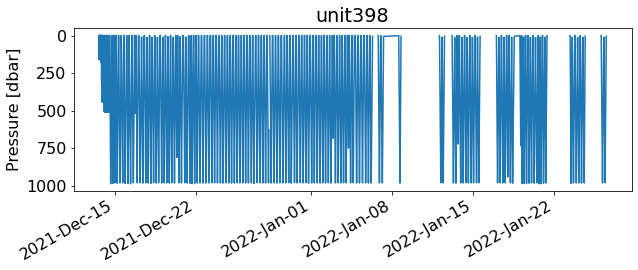

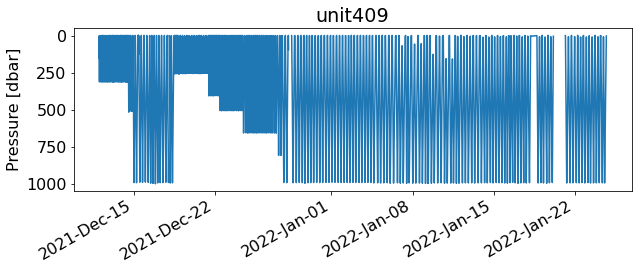

In [8]:
# Plot pressure against time
plot_pressure(unit398,'unit398')
plot_pressure(unit409,'unit409')
# Looks like we are missing recent data from unit398

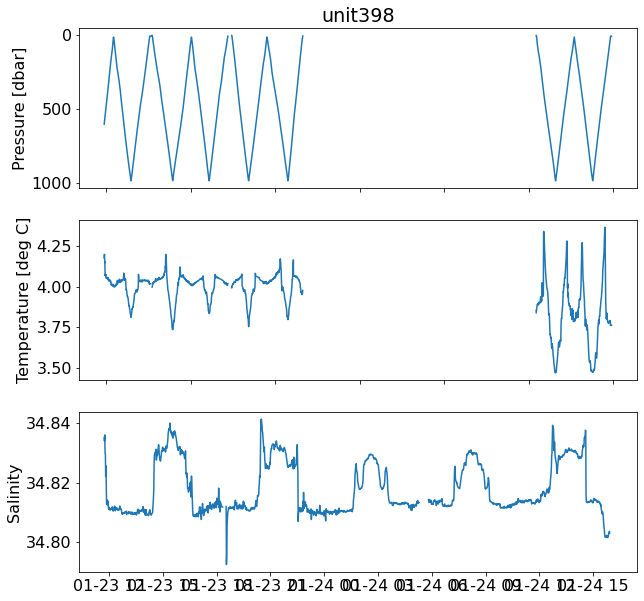

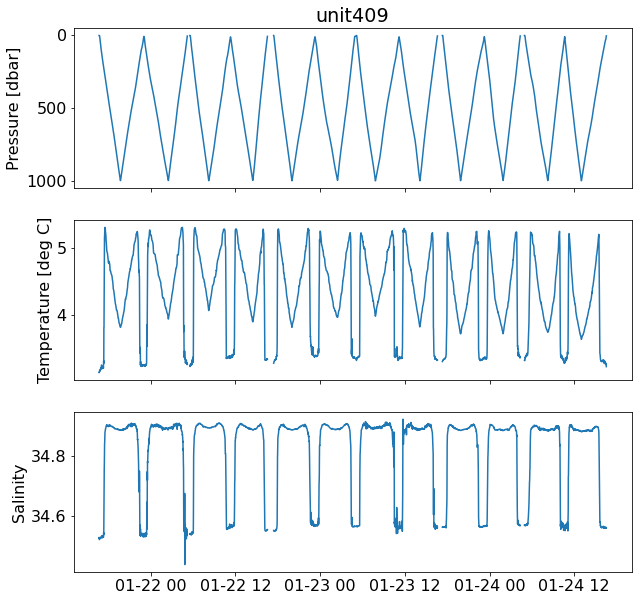

In [9]:
# Plot most recent 3 days
plot_tseries(unit398,3,'unit398')
plot_tseries(unit409,3,'unit409')


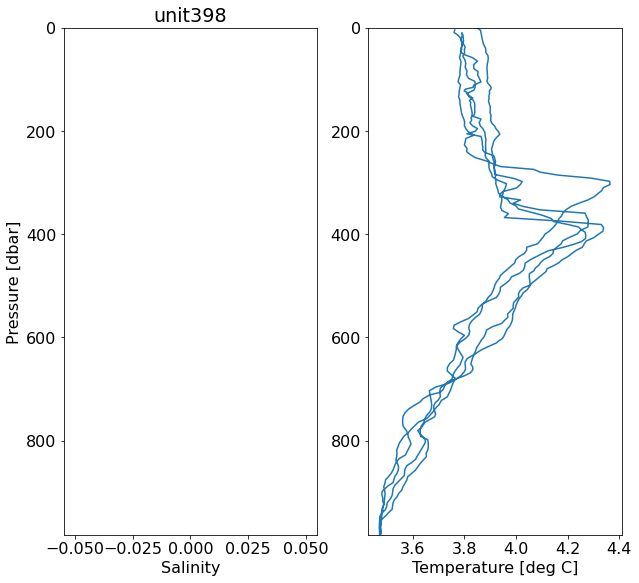

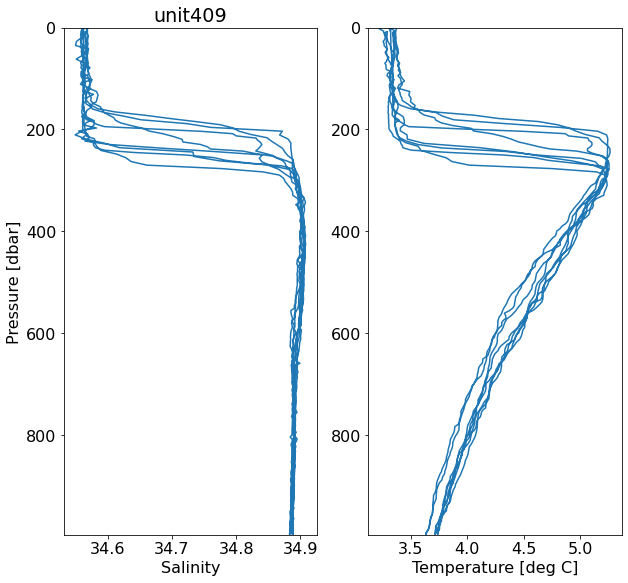

In [10]:
ndays=1
plot_profiles(unit398,ndays,'unit398')
plot_profiles(unit409,ndays,'unit409')


# Simple color sections

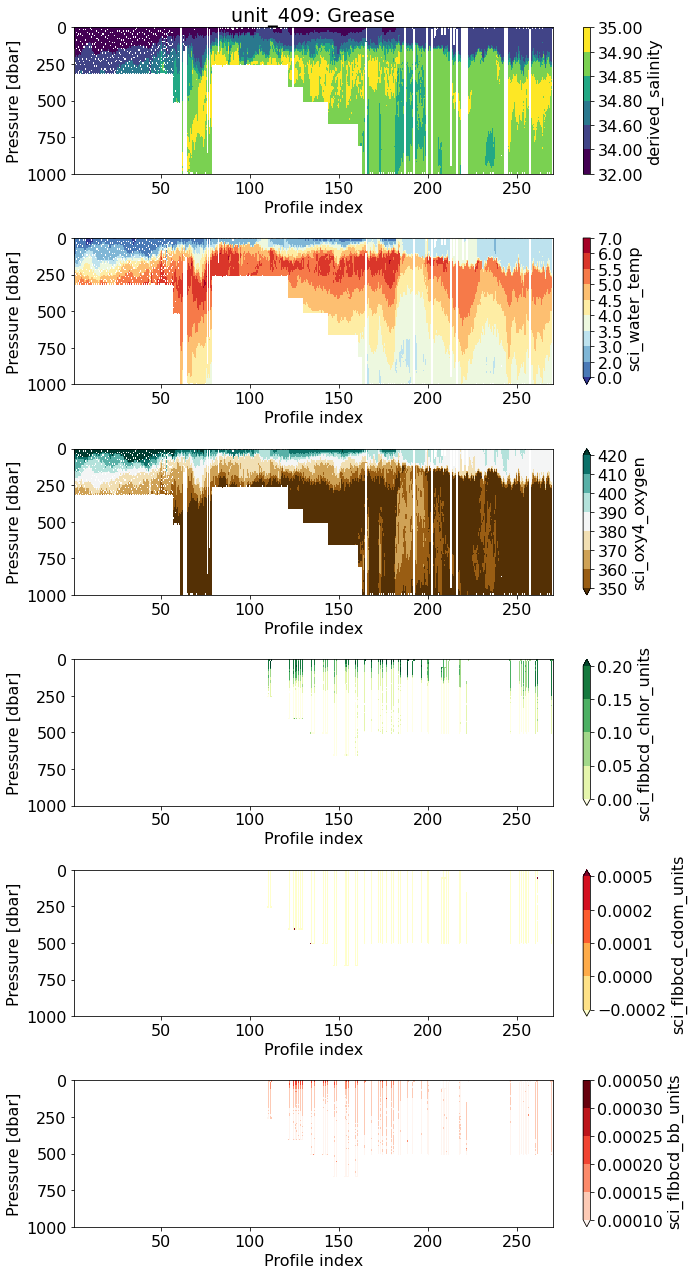

In [12]:
varlist = ['derived_salinity', 'sci_water_temp', 'sci_oxy4_oxygen',
           'sci_flbbcd_chlor_units', 'sci_flbbcd_cdom_units', 
           'sci_flbbcd_bb_units'
          ]
    
plot_sxn(grid409, varlist)

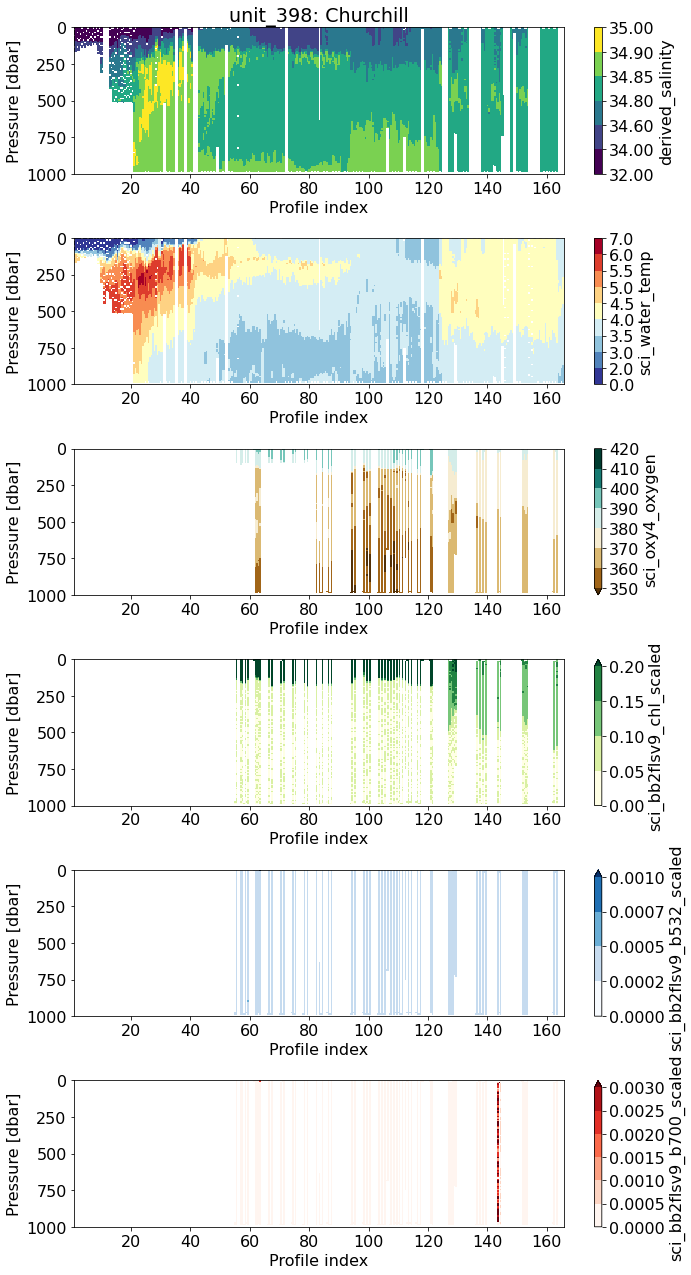

In [11]:
varlist = ['derived_salinity', 'sci_water_temp', 'sci_oxy4_oxygen',
           'sci_bb2flsv9_chl_scaled', 'sci_bb2flsv9_b532_scaled', 
           'sci_bb2flsv9_b700_scaled'
          ]

plot_sxn(grid398, varlist)

# Try waterfall plots (or other technique) to visualise wetlabs

In [29]:
# Would like some waterfall plots, especially of the biological data to see if
# there's anything in there.

grid398

<xarray.Dataset>
Dimensions:                        (pressure: 100, divenum: 330)
Coordinates:
  * divenum                        (divenum) float64 1.0 1.5 2.0 ... 165.0 165.5
  * pressure                       (pressure) float64 5.0 15.0 ... 985.0 995.0
Data variables:
    sci_water_temp                 (pressure, divenum) float64 0.1969 ... nan
    sci_water_cond                 (pressure, divenum) float64 2.722 ... nan
    sci_oxy4_oxygen                (pressure, divenum) float64 nan nan ... nan
    derived_salinity               (pressure, divenum) float64 32.38 ... nan
    derived_potential_density      (pressure, divenum) float64 1.026e+03 ... nan
    derived_potential_temperature  (pressure, divenum) float64 0.1966 ... nan
    m_gps_lon                      (pressure, divenum) float64 -47.07 ... nan
    m_gps_lat                      (pressure, divenum) float64 60.17 nan ... nan
    sci_bb2flsv9_b532_scaled       (pressure, divenum) float64 nan nan ... nan
    sci_bb2flsv9_b700_scaled       (pressure, divenum) float64 nan nan ... nan
    sci_bb2flsv9_chl_scaled        (pressure, divenum) float64 nan nan ... nan
    time                           (pressure, divenum) datetime64[ns] 2021-12...
Attributes:
    unit:     unit398